<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی(Convolutionl Neural Networks - CNN)</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در ابتدا معماری شبکه را مشخص میکنیم.
<br>
به لایه های conv و pool دقت کنید.
<br>
قبل از اولین لایه Dense یا Fully Connected همیشه متد Flatten فراخوانی میشود تا نورون ها به صورت یک وکتور در بیایند.
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اجرا روی Colab</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [ ]:
#!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
#!mkdir dataset
#!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

In [10]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


<div style="direction:rtl;text-align:right;font-family:Tahoma">
نگاهی به تنسور وردی و خروجی هر لایه بیندازیم.
<br>
تصویر ورودی 28x28x3 بوده است
</div>

In [11]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد یک شبکه کانولوشنالی و آموزش آن از ابتدا تا انتها بر روی مجموعه داده هدی</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
تصاویر مجموعه داده هدی در تابعی که قبلا نوشته ایم، load_hoda به صورت flat شده و یک وکتور در آمده اند.
<br>
در این فراخوانی طول و عرض تصاویر 28 قرار داده شده است، پس خروجی این تابع وکتورهای 784تایی است.
<br>
** دقت کنید که قبل از ورودی شبکه کانولوشنالی تصویر را به شکل اصلی خود یعنی 28x28 برگردانده ایم.**
<br>
همچنین چون تصاویر سیاه و سفید است تعداد کانال تصویر را 1 قرار داده ایم.
</div>

In [13]:
# 1. Import libraries and modules
%load_ext tensorboard
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

np.random.seed(123)  # for reproducibility

# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
def schedule(epoch):
    return 1e-3
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
lr = keras.callbacks.LearningRateScheduler(schedule, verbose=1)
history = model.fit(x_train, y_train,
          epochs=200, batch_size=256, validation_data = (x_val, y_val), callbacks=[lr, tensorboard])



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/200
14/14 [==============================] - 1s 57ms/step - loss: 2.0220 - accuracy: 0.3451 - val_loss: 1.3143 - val_accuracy: 0.6900 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/200
14/14 [==============================] - 1s 54ms/step - loss: 1.1955 - accuracy: 0.5997 - val_loss: 0.5598 - val_accuracy: 0.8350 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/200
14/14 [==============================] - 1s 48ms/step - loss: 0.7771 - accuracy: 0.7403 - val_loss: 0.3688 - val_accuracy: 0.8900 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/200
14/14 [==============================] - 1s 50ms/step - loss: 0.5958 - accuracy: 0.8040 - val_loss: 0.2825 - val_accuracy: 0.9050 - lr: 0.0010

Epoch 5: LearningRateScheduler se


Epoch 38: LearningRateScheduler setting learning rate to 0.001.
Epoch 38/200
14/14 [==============================] - 1s 53ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0710 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 39: LearningRateScheduler setting learning rate to 0.001.
Epoch 39/200
14/14 [==============================] - 1s 52ms/step - loss: 0.0464 - accuracy: 0.9840 - val_loss: 0.0627 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 40: LearningRateScheduler setting learning rate to 0.001.
Epoch 40/200
14/14 [==============================] - 1s 50ms/step - loss: 0.0437 - accuracy: 0.9837 - val_loss: 0.0808 - val_accuracy: 0.9700 - lr: 0.0010

Epoch 41: LearningRateScheduler setting learning rate to 0.001.
Epoch 41/200
14/14 [==============================] - 1s 50ms/step - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.0944 - val_accuracy: 0.9800 - lr: 0.0010

Epoch 42: LearningRateScheduler setting learning rate to 0.001.
Epoch 42/200
14/14 [==============================]

Epoch 75/200
14/14 [==============================] - 1s 50ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.1133 - val_accuracy: 0.9800 - lr: 0.0010

Epoch 76: LearningRateScheduler setting learning rate to 0.001.
Epoch 76/200
14/14 [==============================] - 1s 53ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.1232 - val_accuracy: 0.9650 - lr: 0.0010

Epoch 77: LearningRateScheduler setting learning rate to 0.001.
Epoch 77/200
14/14 [==============================] - 1s 51ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.1065 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 78: LearningRateScheduler setting learning rate to 0.001.
Epoch 78/200
14/14 [==============================] - 1s 53ms/step - loss: 0.0205 - accuracy: 0.9923 - val_loss: 0.1097 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 79: LearningRateScheduler setting learning rate to 0.001.
Epoch 79/200
14/14 [==============================] - 1s 54ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0

Epoch 112/200
14/14 [==============================] - 1s 50ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.1062 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 113: LearningRateScheduler setting learning rate to 0.001.
Epoch 113/200
14/14 [==============================] - 1s 53ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.1505 - val_accuracy: 0.9700 - lr: 0.0010

Epoch 114: LearningRateScheduler setting learning rate to 0.001.
Epoch 114/200
14/14 [==============================] - 1s 50ms/step - loss: 0.0131 - accuracy: 0.9943 - val_loss: 0.1650 - val_accuracy: 0.9700 - lr: 0.0010

Epoch 115: LearningRateScheduler setting learning rate to 0.001.
Epoch 115/200
14/14 [==============================] - 1s 49ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.1544 - val_accuracy: 0.9800 - lr: 0.0010

Epoch 116: LearningRateScheduler setting learning rate to 0.001.
Epoch 116/200
14/14 [==============================] - 1s 56ms/step - loss: 0.0097 - accuracy: 0.9963 - val_

Epoch 149/200
14/14 [==============================] - 1s 51ms/step - loss: 0.0081 - accuracy: 0.9969 - val_loss: 0.2304 - val_accuracy: 0.9700 - lr: 0.0010

Epoch 150: LearningRateScheduler setting learning rate to 0.001.
Epoch 150/200
14/14 [==============================] - 1s 53ms/step - loss: 0.0141 - accuracy: 0.9946 - val_loss: 0.1241 - val_accuracy: 0.9700 - lr: 0.0010

Epoch 151: LearningRateScheduler setting learning rate to 0.001.
Epoch 151/200
14/14 [==============================] - 1s 53ms/step - loss: 0.0125 - accuracy: 0.9951 - val_loss: 0.1539 - val_accuracy: 0.9800 - lr: 0.0010

Epoch 152: LearningRateScheduler setting learning rate to 0.001.
Epoch 152/200
14/14 [==============================] - 1s 52ms/step - loss: 0.0093 - accuracy: 0.9963 - val_loss: 0.1231 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 153: LearningRateScheduler setting learning rate to 0.001.
Epoch 153/200
14/14 [==============================] - 1s 51ms/step - loss: 0.0102 - accuracy: 0.9969 - val_

Epoch 186/200
14/14 [==============================] - 1s 54ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.1966 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 187: LearningRateScheduler setting learning rate to 0.001.
Epoch 187/200
14/14 [==============================] - 1s 55ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.2007 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 188: LearningRateScheduler setting learning rate to 0.001.
Epoch 188/200
14/14 [==============================] - 1s 54ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.1968 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 189: LearningRateScheduler setting learning rate to 0.001.
Epoch 189/200
14/14 [==============================] - 1s 54ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.1700 - val_accuracy: 0.9750 - lr: 0.0010

Epoch 190: LearningRateScheduler setting learning rate to 0.001.
Epoch 190/200
14/14 [==============================] - 1s 54ms/step - loss: 0.0032 - accuracy: 0.9986 - val_

In [14]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 13712), started 0:36:21 ago. (Use '!kill 13712' to kill it.)

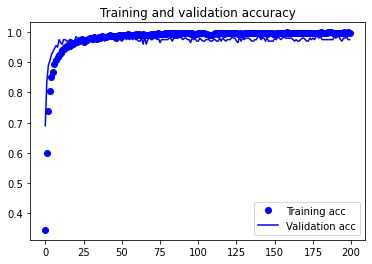

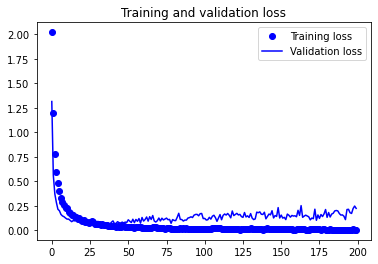

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>